# 📈 MaxExposure: Optimal Ad Spend Strategy using Linear Optimization

This notebook solves a real-world marketing allocation problem using mixed-integer linear programming (MILP). We aim to maximize ad exposure across various media channels within strict budget and category constraints


## 💼 Business Case

SALS Marketing Inc. is developing an advertising plan for a major consumer goods client. An advertising plan specifies how many units of each kind of advertisement to purchase. SALS has promised a plan that will yield the highest possible exposure rating, which is a measure of the ability to reach the appropriate demographic group and generate demand.


The options for advertisements with their respective costs (per-unit of advertising) and per-unit exposure ratings are given in the following table:
<br><br>

$$
\begin{array}{|l|l|c|c|}
\hline
\text{Category} & \text{Subcategory} & \text{Cost (\$1000s) / Unit} & \text{Exposure (1000s) / Unit} \\
\hline
\text{Magazines}  & \text{Literary}    & 7.5  & 15   \\
\text{}  & \text{News}        & 10   & 22.5 \\
\text{}  & \text{Topical}     & 15   & 24   \\
\text{Newspapers} & \text{Morning}     & 2    & 37.5 \\
\text{} & \text{Evening}     & 3    & 75   \\
\text{Television} & \text{Morning}     & 20   & 275  \\
\text{} & \text{Mid-Day}     & 10   & 180  \\
\text{} & \text{Evening}     & 60   & 810  \\
\text{Radio}      & \text{Morning}     & 15   & 180  \\
\text{}      & \text{Mid-Day}     & 15   & 17   \\
\text{}      & \text{Evening}     & 10   & 16   \\
\hline
\end{array}
$$

<br><br>
However, there are restrictions on the advertising plan that SALS can craft for their client. The client corporation has budgeted **\$800,000** for the campaign. Moreover, to restrict overexposure to any particular audience, the client wants no more than **\$300,000** put into any one category, i.e. Magazine, Newspapers, Television, Radio. Additionally, to ensure a broad range of exposure, at least **\$100,000** must be spent in each category. Finally, there has to be an integer number of units purchased of each kind of advertisement as no partial units are allowed.



The goal is to maximize total exposure using a fixed budget of $800,000, while ensuring a balanced distribution across magazines, newspapers, TV, and radio.

## 📝 Business Understanding and Problem Formulation

So, from the business case we're trying to decipher what is the objective, constraints, and decision variables?

From the business case, we can see that SALS wants to "promise a plan that will yield the highest exposure rating" for the client. In other words, the objective is to maximize exposure.

What are the constraints?

The maximum budget is \$800,000, the client wants at most \$300,000 spent on any category, at least \$100,000 spent for each category, and there can be no partial purchases for either media category.

What are the decision variables?

In other words, what choices do we have in control to achieve our objective while respecting our constraints? Well, from the business case, we're trying to decide how many units of each media to purchase to maximize the client's exposure. In total, we have eleven decision variables (literary magazines, news magazines, topical magazines, morning TV, mid-day TV, evening TV, morning radio, mid-day radio, and evening radio).

## ⚙ Code the Problem and Solve

In [1]:
# import libraries
import numpy as np
import cvxpy as cp

In [5]:
# objective function: we want to maximize exposure across all decision variables
# we're going to need a variable list so we can len the list for cp.Variable and later map it to the parameters
# and apply the exposure across all decision variables to get total max exposure for the obj fct

var_names = ['literary_magazines', 'news_magazines', 'topical_magazines',
             'am_newsp', 'pm_newsp', 'am_tv', 'midday_tv', 'pm_tv',
             'am_radio', 'midday_radio', 'pm_radio']

# decision variables of length var_names, where they are whole numbers
# we also need to make sure this constraint can't be negative too

dec_vars = cp.Variable(len(var_names), integer=True)

# we apply the dot product since we want to apply all exposure across decision variables respectively to get total exposure
# so we need to make an array for the exposure per unit for each decision variable

exposure = np.array([15, 22.5, 24, 37.5, 75, 275, 180, 810, 180, 17, 16])

obj_fct = cp.Maximize(dec_vars @ exposure)

# we're going to apply the cost across all decision variables (element wise product),
# and then apply a mask so that only those applicable to that constraint are applied via dot product
# so it'll be cleaner than typing out each constraint
# make sure the exposure and cost arrays are the same order as the mask to make it easier to understand

cost = np.array([7.5, 10, 15, 2, 3, 20, 10, 60, 15, 15, 10])

mag_mask = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
newsp_mask = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])
tv_mask = np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])
radio_mask = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

# these constraints will be added to a constraint list which will be part of the problem argument

constraints = []

# adding the non-neg constraint

constraints.append(dec_vars >= 0)

# adding the budget constraint where we use the dot product to find each decision variables cost sum to less than or equal to 800k

constraints.append(dec_vars @ cost <= 800)

# adding the minmax budget constraint for each category at least 100k and at most 300k
# using the element wise product and mask dot product

constraints.append(mag_mask @ cp.multiply(cost, dec_vars) >= 100)
constraints.append(mag_mask @ cp.multiply(cost, dec_vars) <= 300)
constraints.append(newsp_mask @ cp.multiply(cost, dec_vars) >= 100)
constraints.append(newsp_mask @ cp.multiply(cost, dec_vars) <= 300)
constraints.append(tv_mask @ cp.multiply(cost, dec_vars) >= 100)
constraints.append(tv_mask @ cp.multiply(cost, dec_vars) <= 300)
constraints.append(radio_mask @ cp.multiply(cost, dec_vars) >= 100)
constraints.append(radio_mask @ cp.multiply(cost, dec_vars) <= 300)

# setup the optimization problem

problem = cp.Problem(obj_fct, constraints)

In [6]:
# solve the problem
problem.solve(solver = 'GLPK_MI', verbose = True)

(CVXPY) Jul 18 04:26:04 AM: Your problem has 11 variables, 20 constraints, and 0 parameters.
(CVXPY) Jul 18 04:26:04 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 18 04:26:04 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 18 04:26:04 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 18 04:26:04 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 18 04:26:04 AM: Compiling problem (target solver=GLPK_MI).
(CVXPY) Jul 18 04:26:04 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GLPK_MI
(CVXPY) Jul 18 04:26:04 AM: Applying reduction FlipObjective
(CVXPY) Jul 18 04:26:04 AM: Applying reduction Dcp2Cone
(CVXPY) Jul 18 04:26:04 AM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 18 04:26:04 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 18 04:26:04 AM: Apply

                                     CVXPY                                     
                                     v1.6.7                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


np.float64(14235.0)

In [15]:
print(f"Maximum total exposure: {(problem.value*1000):.0f}\n")

Maximum total exposure: 14235000



In [14]:
for name, val in zip(var_names, dec_vars.value):
    print(f"{name}: {int(round(val))} units")

literary_magazines: 0 units
news_magazines: 10 units
topical_magazines: 0 units
am_newsp: 0 units
pm_newsp: 98 units
am_tv: 0 units
midday_tv: 30 units
pm_tv: 0 units
am_radio: 7 units
midday_radio: 0 units
pm_radio: 0 units


In [23]:
# initialize total cost outside of loop so it starts at 0 so we can print grand total

grand_cost = 0

# zip the variable names with the computed decision variables and if positive
# print the total cost of that category
for name, units, unit_cost in zip(var_names, dec_vars.value, cost):
    units = int(round(units))
    if units > 0:
        total_var_cost = units * unit_cost * 1000  # convert from thousands
        grand_cost += total_var_cost  # accumulate grand total
        print(f"{name}: {units} units → ${total_var_cost:,.0f}")

print(f"\nTotal campaign cost: ${grand_cost:,.0f}")

news_magazines: 10 units → $100,000
pm_newsp: 98 units → $294,000
midday_tv: 30 units → $300,000
am_radio: 7 units → $105,000

Total campaign cost: $799,000


In [26]:
# same idea for total exposure

grand_exposure = 0

for name, units, unit_exposure in zip(var_names, dec_vars.value, exposure):
    units = int(round(units))
    if units > 0:
        total_var_exposure = units * unit_exposure * 1000
        grand_exposure += total_var_exposure
        print(f"{name}: {units} units → {total_var_exposure:,.0f} exposure")


print(f"\nTotal campaign exposure: {grand_exposure:,.0f} impressions")

news_magazines: 10 units → 225,000 exposure
pm_newsp: 98 units → 7,350,000 exposure
midday_tv: 30 units → 5,400,000 exposure
am_radio: 7 units → 1,260,000 exposure

Total campaign exposure: 14,235,000 impressions


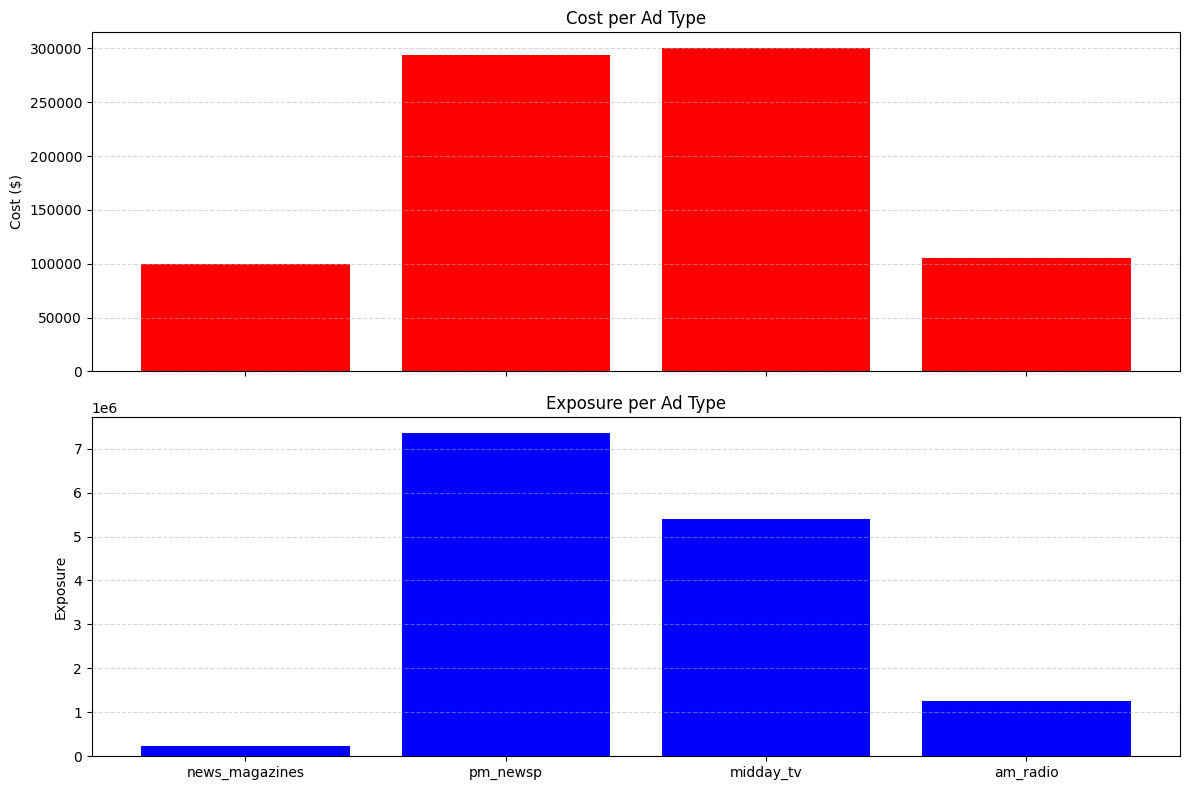

In [34]:
# bar graphs

import matplotlib.pyplot as plt

# step 1: round decision variables

rounded_units = [int(round(u)) for u in dec_vars.value]

# step 2: find total cost and exposure per ad type

total_costs = [u * c * 1000 for u, c in zip(rounded_units, cost)]

total_exposures = [u * e * 1000 for u, e in zip(rounded_units, exposure)]

# step 3: filter nonzero purchases

filtered_names = [name for name, u in zip(var_names, rounded_units) if u > 0]

filtered_costs = [c for c, u in zip(total_costs, rounded_units) if u > 0]

filtered_exposures = [e for e, u in zip(total_exposures, rounded_units) if u > 0]

# step 4: plot with shared x axis

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 8), sharex = True)

# bar chart for costs

ax1.bar(filtered_names, filtered_costs, color = 'red')
ax1.set_ylabel('Cost ($)')
ax1.set_title('Cost per Ad Type')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# bar chart for exposures

ax2.bar(filtered_names, filtered_exposures, color = 'blue')
ax2.set_ylabel('Exposure')
ax2.set_title('Exposure per Ad Type')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# format shared x-axis
plt.tight_layout()
plt.show()


## 📄 Conclusion

In conclusion this project allowed us to formulate and solve a linear integer optimization problem to determine the most effective advertising strategy for SALS Marketing Inc.'s client. Using CVXPY, we maximized the total exposure across various advertising channels including magazines, newspapers, television, and radio while adhering to strict budgetary and category constraints.

The model successfully identified an optimal mix of ad units that maximized exposure within the \$800,000 budget. It ensured that spending across categories stayed within client-specified bounds:
- no more than \$300,000 in any one category
- no less than \$100,000 in any one category
- no partial purchases

All reflecting real-world purchasing limitations.

The final advertising plan produced a **total exposure of 14,235,000 impressions** at a **total cost of \$799,000** allocating resources strategically across only a subset of available media types:
- 10 units of news magazines
- 98 units of evening newspaper
- 30 units of mid-day TV
- 7 units of a.m. radio


The results were visualized to provide actionable insights and clearly communicate how each selected ad type contributed to the campaign's cost and reach.

This approach demonstrates how linear programming can support data-driven marketing decisions, helping companies allocate advertising budgets efficiently while meeting strategic goals.

